In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Activation, Flatten, Dropout, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Computer_Vision/03_FACE_KEYPOINT_RECOGNITION/DATA/training.csv")

In [ ]:
train_data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [ ]:
train_data.fillna(method = 'ffill' , inplace = True)

In [ ]:
train_data.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [ ]:
def process_img(data):
    images = []
    for idx, sample in data.iterrows():
        image = np.array(sample['Image'].split(' '), dtype=int)
        image = np.reshape(image, (96,96,1))
        images.append(image)
    images = np.array(images)/255.
    return images

def keypoints(data):
    keypoint = data.drop('Image',axis = 1)
    keypoint_features = []
    for idx, sample_keypoints in keypoint.iterrows():
        keypoint_features.append(sample_keypoints)
    keypoint_features = np.array(keypoint_features, dtype = 'float')
    return keypoint_features

In [ ]:
x_train = process_img(train_data)
y_train = keypoints(train_data)

In [ ]:
column_names = "left_eye_center_x left_eye_center_y right_eye_center_x right_eye_center_y left_eye_inner_corner_x left_eye_inner_corner_y left_eye_outer_corner_x left_eye_outer_corner_y right_eye_inner_corner_x right_eye_inner_corner_y right_eye_outer_corner_x right_eye_outer_corner_y left_eyebrow_inner_end_x left_eyebrow_inner_end_y left_eyebrow_outer_end_x left_eyebrow_outer_end_y right_eyebrow_inner_end_x right_eyebrow_inner_end_y right_eyebrow_outer_end_x right_eyebrow_outer_end_y nose_tip_x nose_tip_y mouth_left_corner_x mouth_left_corner_y mouth_right_corner_x mouth_right_corner_y mouth_center_top_lip_x mouth_center_top_lip_y mouth_center_bottom_lip_x mouth_center_bottom_lip_y"

column_names_list = column_names.split()
x_values = [name for name in column_names_list if name.endswith('_x')]
y_values = [name for name in column_names_list if name.endswith('_y')]

print("X values:", x_values)
print("Y values:", y_values)

X values: ['left_eye_center_x', 'right_eye_center_x', 'left_eye_inner_corner_x', 'left_eye_outer_corner_x', 'right_eye_inner_corner_x', 'right_eye_outer_corner_x', 'left_eyebrow_inner_end_x', 'left_eyebrow_outer_end_x', 'right_eyebrow_inner_end_x', 'right_eyebrow_outer_end_x', 'nose_tip_x', 'mouth_left_corner_x', 'mouth_right_corner_x', 'mouth_center_top_lip_x', 'mouth_center_bottom_lip_x']
Y values: ['left_eye_center_y', 'right_eye_center_y', 'left_eye_inner_corner_y', 'left_eye_outer_corner_y', 'right_eye_inner_corner_y', 'right_eye_outer_corner_y', 'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_y', 'nose_tip_y', 'mouth_left_corner_y', 'mouth_right_corner_y', 'mouth_center_top_lip_y', 'mouth_center_bottom_lip_y']


In [ ]:
Y_train_x = train_data.loc[: , ['left_eye_center_x', 'right_eye_center_x', 'left_eye_inner_corner_x', 'left_eye_outer_corner_x', 'right_eye_inner_corner_x', 'right_eye_outer_corner_x', 'left_eyebrow_inner_end_x', 'left_eyebrow_outer_end_x', 'right_eyebrow_inner_end_x', 'right_eyebrow_outer_end_x', 'nose_tip_x', 'mouth_left_corner_x', 'mouth_right_corner_x', 'mouth_center_top_lip_x', 'mouth_center_bottom_lip_x']]
Y_train_y = train_data.loc[: , ['left_eye_center_y', 'right_eye_center_y', 'left_eye_inner_corner_y', 'left_eye_outer_corner_y', 'right_eye_inner_corner_y', 'right_eye_outer_corner_y', 'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_y', 'nose_tip_y', 'mouth_left_corner_y', 'mouth_right_corner_y', 'mouth_center_top_lip_y', 'mouth_center_bottom_lip_y']]

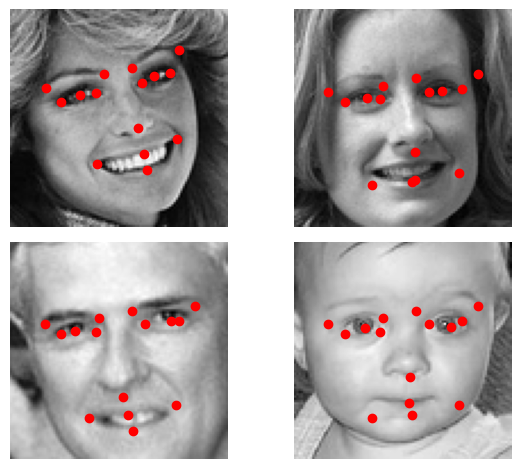

In [ ]:
fig , ax = plt.subplots(2, 2)
for i in range(2):
    for j in range(2) :
        rand_data = random.choice(range(x_train.shape[0]))
        x0=Y_train_x.iloc[rand_data,:]
        y0=Y_train_y.iloc[rand_data,:]
        ax[i][j].imshow(np.squeeze(x_train[rand_data]),cmap='gray')
        ax[i][j].scatter(x0, y0,color ='red')
        ax[i][j].axis("off")

plt.tight_layout()

In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv2D(64, (3, 3), padding='same', input_shape=(96, 96, 1)),
    layers.LeakyReLU(),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.LeakyReLU(),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.LeakyReLU(),
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(128),
    layers.ReLU(),
    layers.Dense(96),
    layers.ReLU(),
    layers.Dense(64),
    layers.ReLU(),
    layers.Dense(30)
])

model.compile(optimizer='adam',loss='huber_loss',metrics=['accuracy'])

In [ ]:
hisotry = model.fit(x_train, y_train, epochs=50, batch_size=256, validation_split = 0.15)

Epoch 1/50
24/24 [==============================] - 4s 178ms/step - loss: 0.4616 - accuracy: 0.8817 - val_loss: 0.9066 - val_accuracy: 0.7439
Epoch 2/50
24/24 [==============================] - 4s 169ms/step - loss: 0.4819 - accuracy: 0.8853 - val_loss: 0.6959 - val_accuracy: 0.7202
Epoch 3/50
24/24 [==============================] - 4s 170ms/step - loss: 0.4519 - accuracy: 0.8817 - val_loss: 0.7131 - val_accuracy: 0.7760
Epoch 4/50
24/24 [==============================] - 4s 170ms/step - loss: 0.4853 - accuracy: 0.8818 - val_loss: 0.8470 - val_accuracy: 0.7958
Epoch 5/50
24/24 [==============================] - 4s 174ms/step - loss: 0.5392 - accuracy: 0.8830 - val_loss: 1.0467 - val_accuracy: 0.7051
Epoch 6/50
24/24 [==============================] - 4s 180ms/step - loss: 0.4733 - accuracy: 0.8887 - val_loss: 0.7085 - val_accuracy: 0.7732
Epoch 7/50
24/24 [==============================] - 4s 179ms/step - loss: 0.4208 - accuracy: 0.8930 - val_loss: 0.6369 - val_accuracy: 0.7987
Epoch 

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Computer_Vision/03_FACE_KEYPOINT_RECOGNITION/DATA/test.csv')

In [ ]:
y_test = process_img(test_data)

In [ ]:
pred = model.predict(y_test)

56/56 [==============================] - 1s 11ms/step


In [ ]:
pred.shape ,y_test.shape

((1783, 30), (1783, 96, 96, 1))

In [ ]:
pred[1]

array([66.1996  , 36.97885 , 27.803381, 37.069073, 61.579926, 37.04723 ,
       73.924774, 37.523777, 34.18364 , 38.49758 , 20.753885, 38.349876,
       55.63604 , 30.483644, 79.924416, 29.20842 , 37.34795 , 30.843985,
       13.896488, 31.387278, 50.497746, 58.348736, 64.94672 , 75.404015,
       34.279545, 77.03234 , 49.45671 , 71.87808 , 48.59178 , 86.62771 ],
      dtype=float32)

In [ ]:
def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='o', s=20, color='r')
    plt.title(title)

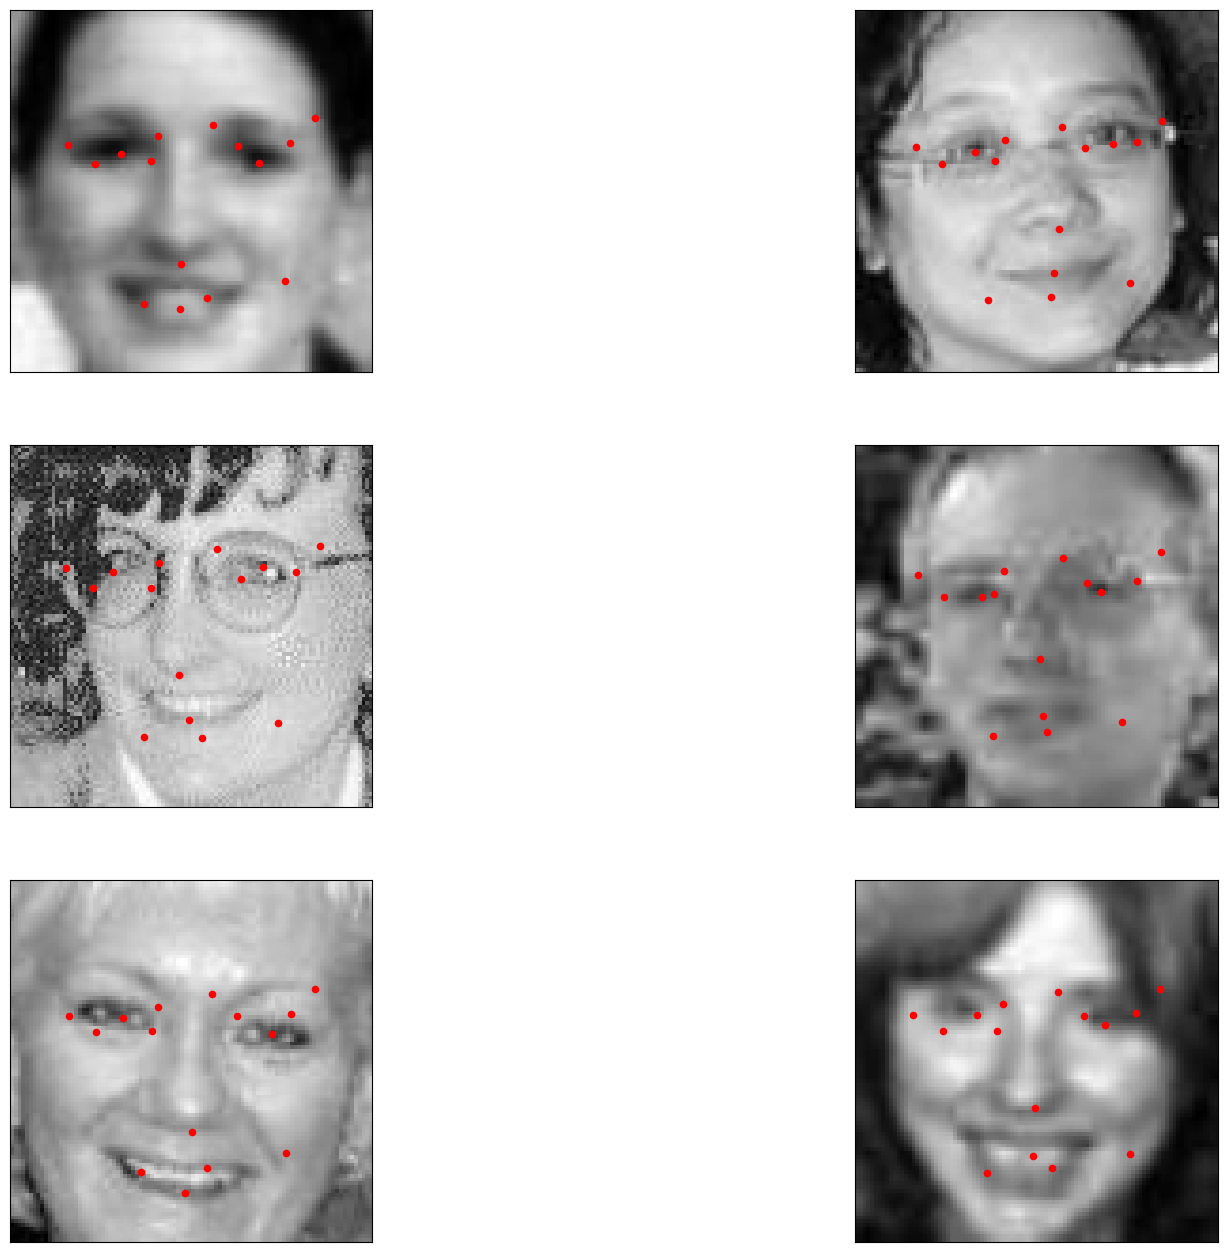

In [ ]:
fig  = plt.figure(figsize=(20,16))
rand_list = random.sample(range(len(pred)), 6)
i = 0
for a in rand_list:
    axis = fig.add_subplot(3 , 2 , i+1, xticks=[], yticks=[])
    plot_sample(y_test[a], pred[a], axis, "")
    i+=1
plt.show()

<Axes: >

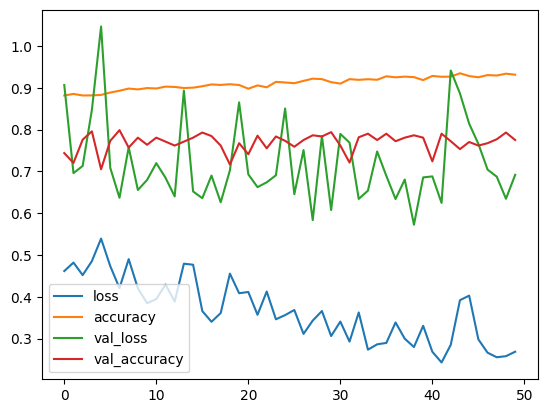

In [ ]:
pd.DataFrame(hisotry.history).plot()

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Computer_Vision/03_FACE_KEYPOINT_RECOGNITION/model/model.h5" , include_optimizer = False)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save("model.h5", include_optimizer=False)

In [ ]:
model.weights

[<tf.Variable 'conv2d_7/kernel:0' shape=(3, 3, 1, 64) dtype=float32, numpy=
 array([[[[ 0.07653013, -0.05901045, -0.00152318,  0.06902497,
           -0.05112685, -0.02101968,  0.08191048,  0.06044164,
           -0.10168798, -0.05392168,  0.0852109 , -0.05481884,
            0.06783209,  0.07861852,  0.08807532, -0.00568406,
            0.04041523, -0.03446266,  0.09314954,  0.07136894,
           -0.04990571, -0.03892714,  0.04829783,  0.01895783,
            0.08029082, -0.0190797 ,  0.07727472, -0.09778401,
            0.05965414, -0.07408378, -0.05289105, -0.06874945,
           -0.04746818,  0.06081439,  0.04201945, -0.02550243,
           -0.03763043, -0.05729172, -0.02615638, -0.00417708,
            0.05563686, -0.00861767,  0.00379368, -0.01465987,
            0.05007604, -0.03226116,  0.04312471, -0.00875342,
           -0.01531814,  0.10758433,  0.06194599,  0.07681214,
           -0.03508355, -0.06945356, -0.04327568,  0.02196741,
           -0.09871902, -0.09112283, -0.02

In [ ]:
pred[0]

array([63.939465, 37.374252, 29.55452 , 35.04671 , 60.380344, 36.242863,
       72.22712 , 36.159145, 34.47355 , 37.396675, 22.540949, 36.524982,
       55.0327  , 27.195425, 78.780716, 27.503544, 37.263027, 26.368877,
       15.880828, 27.136866, 47.801796, 51.319767, 63.337418, 73.61824 ,
       33.39561 , 74.1588  , 48.333824, 68.61288 , 46.076107, 83.7944  ],
      dtype=float32)